In [84]:
import pandas as pd
import numpy as np
import seaborn as sb
import json

from pandas.io.json import json_normalize

%matplotlib inline
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [85]:
df = pd.read_csv('data.csv')

In [86]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

       ...       Composure Marking  StandingTackle SlidingTackle  GKDiving  \
0      ...            96.0    33.0            28.0          26.0       6.0   
1      ...            95.0    28.0            31.0          23.0       7.0   
2      ...            94.0    27.0            24.0          33.0       9.0   
3      ...            68.0    15.0            21.0          13.0      90.0   
4      ...            88.0    68.0            58.0          51.0      15.0   

   GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
0        11.0       15.0          14.0        8.0        €226.5M  
1        11.0       15.0          14.0       11.0        €127.1M  
2         9.0       15.0          15.0       11.0        €228.1M  
3        85.0       87.0          88.0       94.0        €138.6M  
4        13.0        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [87]:
df.dtypes


ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [132]:
agg_a = {'Age':'mean',
         'Overall':'mean',
         'Potential':'mean',
         #'Value':'mean',
         #'Wage':'mean'
        }


club_avgs_df = df.groupby('Club').agg(agg_a)
club_avgs_df['Net Potential'] = (club_avgs_df['Potential'] - club_avgs_df['Overall'])


In [133]:
club_avgs_df.sort_values('Overall', ascending = False).head()

Age    Overall  Potential  Net Potential
Club                                                       
Juventus     27.160000  82.280000  85.520000       3.240000
Napoli       25.920000  80.000000  83.440000       3.440000
Inter        27.458333  79.750000  81.750000       2.000000
Real Madrid  24.030303  78.242424  84.636364       6.393939
Milan        25.000000  78.074074  82.555556       4.481481

In [140]:
top_10_net_pot_df = club_avgs_df.sort_values('Net Potential', ascending = False).head(10)
top_10_net_pot_df = top_10_net_pot_df.reset_index()
top_10_net_pot_df

Club        Age    Overall  Potential  Net Potential
0         FC Nordsjælland  20.259259  60.962963  71.962963      11.000000
1          Stabæk Fotball  22.074074  60.814815  71.703704      10.888889
2             Envigado FC  22.035714  61.285714  71.464286      10.178571
3              Derry City  22.111111  55.777778  65.888889      10.111111
4  FC Sochaux-Montbéliard  21.678571  62.642857  72.642857      10.000000
5         Crewe Alexandra  23.357143  56.785714  66.250000       9.464286
6              LOSC Lille  22.000000  69.640000  78.960000       9.320000
7             Bohemian FC  21.480000  55.000000  64.240000       9.240000
8                Barnsley  22.107143  61.821429  70.964286       9.142857
9          Bray Wanderers  22.217391  53.652174  62.608696       8.956522

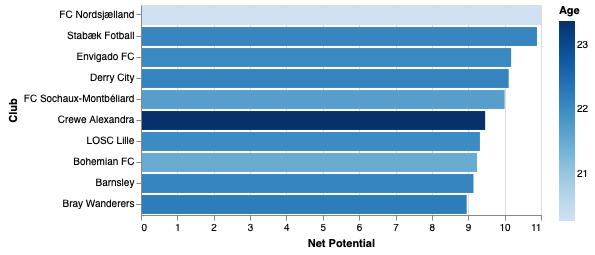

In [154]:
alt.Chart(top_10_net_pot_df).mark_bar().encode(
    x='Net Potential:Q',
    y=alt.Y(
        'Club:N',
        sort=alt.EncodingSortField(
            field="Net Potential",  
            op="sum",  
            order="descending")),
    color='Age'
)

In [141]:
top_10_pot_df = club_avgs_df.sort_values('Potential', ascending = False).head(10)
top_10_pot_df = top_10_pot_df.reset_index()
top_10_pot_df

Club        Age    Overall  Potential  Net Potential
0             Juventus  27.160000  82.280000  85.520000       3.240000
1         FC Barcelona  23.848485  78.030303  85.303030       7.272727
2          Real Madrid  24.030303  78.242424  84.636364       6.393939
3      Manchester City  23.909091  76.727273  83.909091       7.181818
4    FC Bayern München  24.310345  77.000000  83.655172       6.655172
5  Paris Saint-Germain  24.566667  77.433333  83.566667       6.133333
6               Napoli  25.920000  80.000000  83.440000       3.440000
7    Manchester United  24.757576  77.242424  82.666667       5.424242
8              Chelsea  25.212121  76.787879  82.636364       5.848485
9                Milan  25.000000  78.074074  82.555556       4.481481

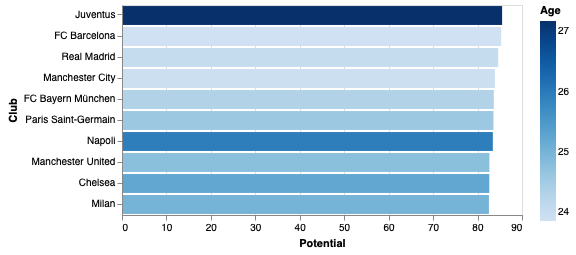

In [157]:
alt.Chart(top_10_pot_df).mark_bar().encode(
    x='Potential:Q',
    y=alt.Y(
        'Club:N',
        sort=alt.EncodingSortField(
            field="Potential",  
            op="sum",  
            order="descending")),
    color='Age'
)

In [138]:
df['Net Potential'] = df['Potential'] - df['Overall']
df_16_to_21 = df[df['Age'] > 17]
df_16_to_21 = df[df['Age'] < 22]


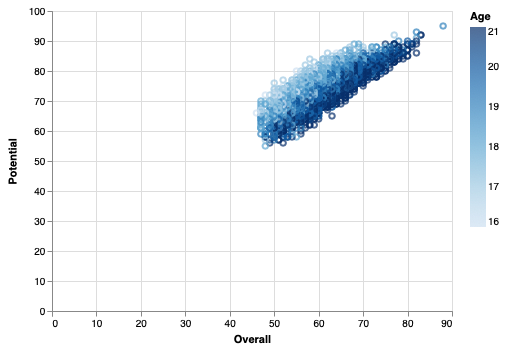

In [139]:
alt.Chart(df_16_to_21).mark_point().encode(
    x='Overall',
    y='Potential',
    color = 'Age'
).interactive()

In [164]:
agg_b = {#'Age':'mean',
         'Overall':'mean',
         'Potential':'mean',
         #'Value':'mean',
         #'Wage':'mean'
        }
age_df = df.groupby('Age').agg(agg_b).reset_index()
age_df['Net Potential'] = age_df['Potential']-age_df['Overall']
age_df.head()

Age    Overall  Potential  Net Potential
0   16  54.452381  73.190476      18.738095
1   17  56.404844  74.339100      17.934256
2   18  57.741803  73.530055      15.788251
3   19  59.583008  73.146484      13.563477
4   20  61.858871  73.213710      11.354839

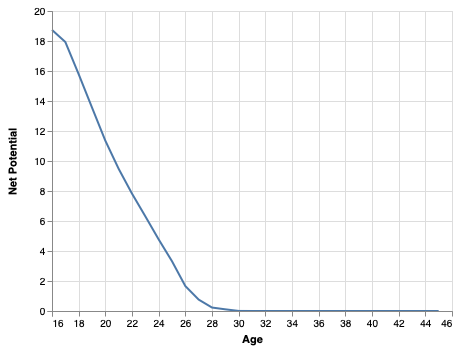

In [161]:
alt.Chart(age_df).mark_line().encode(
    x='Age',
    y='Net Potential'
)